**Installing Required Libraries**

In [1]:
!pip install pandas matplotlib seaborn scikit-learn

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Loading Dataset**

In [4]:
df = pd.read_csv("insurance_data.csv")

In [5]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39,Male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24,Male,30.1,87,No,0,No,southeast,1131.51
2,7,8,19,Male,41.1,100,No,0,No,northwest,1146.80
3,8,9,20,Male,43.0,86,No,0,No,northwest,1149.40
4,9,10,30,Male,53.1,97,No,0,No,northwest,1163.46


**Basic EDA and Preprocessing**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1332 non-null   int64  
 1   PatientID      1332 non-null   int64  
 2   age            1332 non-null   int64  
 3   gender         1332 non-null   object 
 4   bmi            1332 non-null   float64
 5   bloodpressure  1332 non-null   int64  
 6   diabetic       1332 non-null   object 
 7   children       1332 non-null   int64  
 8   smoker         1332 non-null   object 
 9   region         1332 non-null   object 
 10  claim          1332 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 114.6+ KB


In [7]:
df.isnull()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1327,False,False,False,False,False,False,False,False,False,False,False
1328,False,False,False,False,False,False,False,False,False,False,False
1329,False,False,False,False,False,False,False,False,False,False,False
1330,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [9]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [10]:
df_encoded.head()

,index,PatientID,age,bmi,bloodpressure,children,claim,gender_Male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,0,1,39,23.2,91,0,1121.87,True,True,False,False,True,False
1,1,2,24,30.1,87,0,1131.51,True,False,False,False,True,False
2,7,8,19,41.1,100,0,1146.80,True,False,False,True,False,False
3,8,9,20,43.0,86,0,1149.40,True,False,False,True,False,False
4,9,10,30,53.1,97,0,1163.46,True,False,False,True,False,False


**Visualizing Impact of Features on Charges**

In [11]:
print(df.columns)

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')


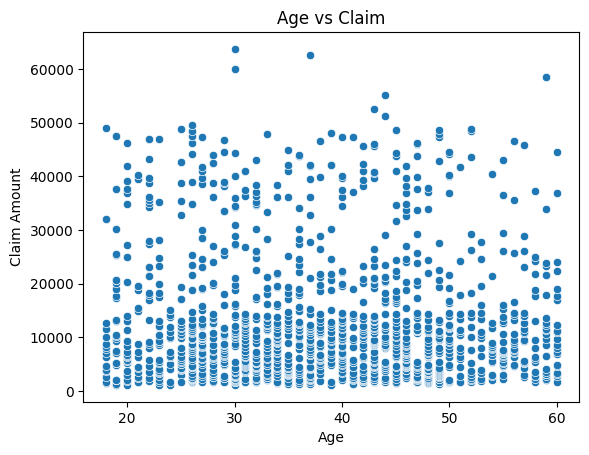

In [12]:
# Plotting scatter ( Age vs Charges )
sns.scatterplot(data=df, x='age', y='claim')
plt.xlabel("Age")
plt.ylabel("Claim Amount")
plt.title("Age vs Claim")
plt.show()

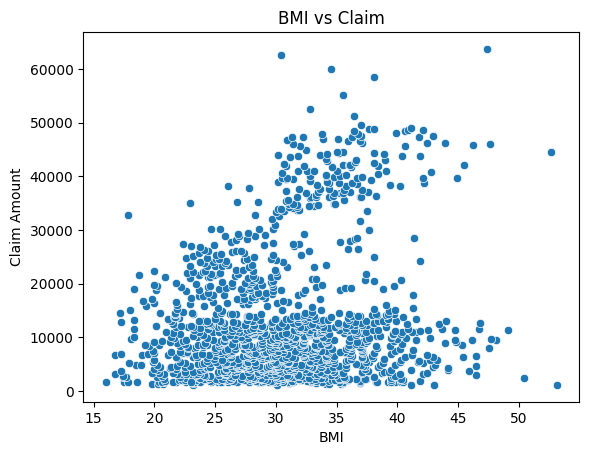

In [13]:
# Plot BMI vs Claim
sns.scatterplot(data=df, x='bmi', y='claim')
plt.title("BMI vs Claim")
plt.xlabel("BMI")
plt.ylabel("Claim Amount")
plt.show()

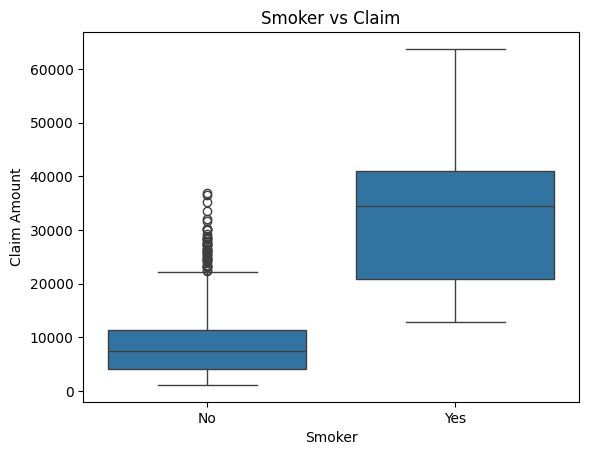

In [14]:
# Boxplot for Smoker vs Claim
sns.boxplot(data=df, x='smoker', y='claim')
plt.title("Smoker vs Claim")
plt.xlabel("Smoker")
plt.ylabel("Claim Amount")
plt.show()

In [15]:
# Make sure all categorical variables are encoded
df_encoded = pd.get_dummies(df.drop(columns=['index', 'PatientID']), drop_first=True)

In [16]:
# Features and target
X = df_encoded.drop('claim', axis=1)
y = df_encoded['claim']

**Features and Target Columns**

In [17]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

**Training the Model and Prediction**

In [18]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict
y_pred = model.predict(X_test)

**Evaluate Model Performance**

In [20]:
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 4910.91
Root Mean Squared Error (RMSE): 6234.64


**Summary: Insurance Claim Amount Prediction**
         This project builds a Linear Regression model to predict medical insurance claim amounts using personal and health-related attributes. The dataset includes key features such as age,BMI,smoking status, blood pressure, and diabetic condition.

**Key Insights:**

-Smoking and high BMI are strongly associated with higher medical claim amounts.

-Age is positively correlated with medical expenses.

-The model offers a baseline prediction tool for insurance cost estimation.

-Model Training: Trained a Linear Regression model on 80% of the data.

-Model Evaluation: Assessed model performance using:

              -MAE (Mean Absolute Error): gives the average magnitude of errors.
              -RMSE (Root Mean Squared Error): penalizes large errors more than MAE.

